In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import distance
import naloga

1. Mitchellov algoritem zgenerira mrežo

In [2]:
r = 2
grid = [100, 100]
width, height = grid

k = 5       # stevilo kandidatov
m = 2       # zacetno stevilo tock
N = 128     # stevilo vseh tock

In [3]:
initial = np.array([ [random.uniform(0,1)*width, random.uniform(0,1)*height] for i in range(m) ])

In [4]:
dist = naloga.distribution(initial, grid, N)
#display(dist.samples)

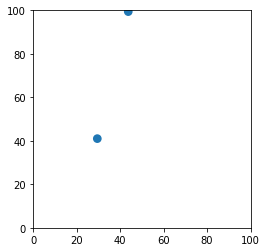

In [5]:
plt.axes()

for center in initial:
    circle = plt.Circle(center, radius=r)
    plt.gca().add_patch(circle)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()

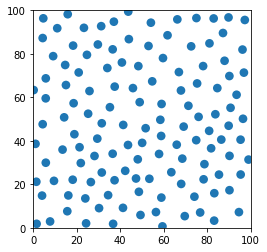

In [6]:
plt.axes()

for center in dist.samples:
    circle = plt.Circle(center, radius=r)
    plt.gca().add_patch(circle)

    # print(center[0], center[1], sep='\t', file=open('porazdelitev.txt', 'a'))

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()

____
2. V središča točk postavim elipse z naključnimi začetnimi orientacijami

In [7]:
a, b = 5, 2                     # mala in velika polos
a_width, b_height = 2*a, 2*b    # mala in velika polos za patches
eps = math.sqrt(1-(b/a)**2)     # ekscentričnost 

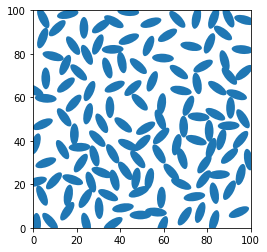

In [8]:
## v točke postavi elipse
plt.axes()

new_dist = naloga.ellipses(dist, a, b)

for center in new_dist.ell:

    # u = random.uniform(0,1)
    # theta = math.pi*2*u
    theta = center.angle

    va = [math.cos(theta), math.sin(theta)]
    vb = [-math.sin(theta), math.cos(theta)]
    
    ellipse = naloga.ellipse.convert_to_patches(center, a_width, b_height)
    plt.gca().add_patch(ellipse)
    # data.append(ellipse)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
# plt.savefig("elipse_512.png")
plt.show()


_____
3. Wertheim-Perramova kontaktna funkcija

$ f = \lambda (1-\lambda) \vec{r}_{12}^{T} \cdot Q^{-1} \cdot \vec{r}_{12} \quad 
\rightarrow \quad \mu = \mathrm{max} [ f(\lambda, \vec{r}_{12}, Q_1, Q_2), 0 \leq \lambda \leq 1 ] \\$
kjer so \
$\hat{Q_j}=\sum_{i=1,2} a_i^2 \, \hat{\vec{e}}_i \cdot \hat{\vec{e}}_i^T, \quad
Q_j = R(\theta) \cdot \hat{Q_j} \cdot R^T(\theta \quad \rightarrow \quad
Q = (1-\lambda) Q_1 + \lambda Q_2 $ \
in \
$ \vec{r}_{12} = \vec{r}_{2} - \vec{r}_{1}$

___
Preveri cel grid, če se kaj seka

In [10]:
## matrika razdalj med vsemi centri elips
S = [x.center for x in new_dist.ell]
razdalje = distance.cdist(S, S, dist.periodic_metric)
in_proximity = [np.where((line<2*a) & (line!=0)) for line in razdalje]

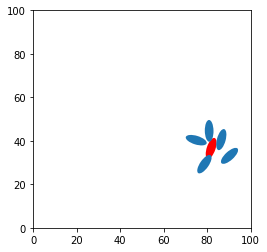

In [12]:
## izberi i-to elipso in poglej njeno okolico
i = 100
i_ellipse = new_dist.ell[i]

plt.axes()
ell_patch = naloga.ellipse.convert_to_patches(i_ellipse, a_width, b_height)
plt.gca().add_patch(ell_patch)
ell_patch.set_facecolor('r')

check = new_dist.ell[in_proximity[i]]
for E in check:

    theta = E.angle
    ell_patch = naloga.ellipse.convert_to_patches(E, a_width, b_height)
    plt.gca().add_patch(ell_patch)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()

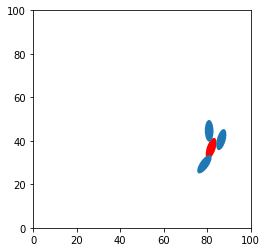

In [13]:
## nariši samo tiste ki se z i-to elipso sekajo
neighbourhood = np.array([new_dist.mu(i_ellipse, neighbour) for neighbour in check])

plt.axes()

ell_patch = naloga.ellipse.convert_to_patches(i_ellipse, a_width, b_height)
plt.gca().add_patch(ell_patch)
ell_patch.set_facecolor('r')

in_contact = check[np.where(neighbourhood<1)]
for E in in_contact:
    theta = E.angle
    ell_patch = naloga.ellipse.convert_to_patches(E, a_width, b_height)
    plt.gca().add_patch(ell_patch)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()